<a href="https://colab.research.google.com/github/Sanim27/DeepL_from_scratch/blob/main/DeepNN_Dropout%26reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Initialize parameters.

First, for 2 layer neural network. With one hidden layer and one output layer.

In [19]:
import numpy as np

In [20]:
def initialize_parameters(n_x,n_h,n_y):
  W1=np.random.randn(n_h,n_x)*0.01
  b1=np.zeros((n_h,1))
  W2=np.random.randn(n_y,n_h)*0.01
  b2=np.zeros((n_y,1))

  parameters={"W1":W1,"b1":b1,"W2":W2,"b2":b2}
  return parameters

Now, for L layer deep neural network. Initialization.

In [21]:
def initialize_deep(layer_dims):
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters


Now forward_propagation.

In [22]:
def sigmoid(Z):
  return 1/(1+np.exp(-Z)),Z

In [23]:
def relu(Z):
  return np.maximum(0, Z),Z

In [24]:
def linear_forward(A,W,b):
  Z=np.dot(W,A)+b
  cache=(A,W,b)
  return Z,cache

The caching in above function is done so that it helps in back_prop

In [25]:
def linear_activation_forward(A_prev, W, b, activation):
  if activation=="sigmoid":
    Z,linear_cache=linear_forward(A_prev,W,b)
    A,activation_cache=sigmoid(Z)
  elif activation=="relu":
    Z,linear_cache=linear_forward(A_prev,W,b)
    A,activation_cache=relu(Z)
  cache=(linear_cache,activation_cache)
  return A,cache

### Now lets implement the L-layer forward prop

In [26]:
def L_model_forward(parameters,X):
  caches=[]
  A=X
  L=len(parameters)//2   #// is used to ensure L is integer as we have to loop through it.
  for l in range(1,L):
    A_prev=A
    A,cache=linear_activation_forward(A_prev,parameters["W"+str(l)],parameters["b"+str(l)],"relu")
    caches.append(cache)

  AL,cache=linear_activation_forward(A,parameters["W"+str(L)],parameters["b"+str(L)],"sigmoid")
  caches.append(cache)
  return AL,caches

Computing cost now...

In [27]:
def compute_cost(AL,Y):
  m=Y.shape[1]
  logprobs=np.multiply(np.log(AL),Y)+np.multiply(np.log(1-AL),1-Y)
  cost=-np.sum(logprobs)/m
  cost=float(np.squeeze(cost))
  return cost

### Here comes the fun part: BACK PROPAGATION...

In [28]:
def linear_backward(dZ,cache):
  A_prev,W,b=cache
  m=A_prev.shape[1]
  dW=(1/m)*np.dot(dZ,A_prev.T)
  db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
  dA_prev=np.dot(W.T,dZ)

  return dA_prev,dW,db

In [29]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    A = 1 / (1 + np.exp(-Z))  # Calculate sigmoid output A
    dZ = dA * A * (1 - A)     # Use derivative A(1 - A)
    return dZ

In [30]:
def relu_backward(dA,activation_cache):
  Z=activation_cache
  return dA*(Z>0)

In [31]:
def linear_activation_backward(dA,cache,activation):
  linear_cache,activation_cache=cache
  if activation=="sigmoid":
    dZ=sigmoid_backward(dA,activation_cache)
  elif activation=="relu":
    dZ=relu_backward(dA,activation_cache)
  dA_prev,dW,db=linear_backward(dZ,linear_cache)
  return dA_prev,dW,db

Testing these first.

In [32]:
import numpy as np

# Create dummy inputs
np.random.seed(1)
A_prev = np.random.randn(3, 2)   # Simulate 3 neurons, 2 examples
W = np.random.randn(1, 3)        # 1 output, 3 inputs
b = np.random.randn(1, 1)        # 1 output bias
Z = np.random.randn(1, 2)        # Linear output (before activation)

# Cache for the backward functions
cache = (A_prev, W, b)
activation_cache = Z

# Simulate dA (upstream gradient, random for testing)
dA = np.random.randn(1, 2)

# Test sigmoid_backward
print("Testing sigmoid_backward:")
dZ_sigmoid = sigmoid_backward(dA, activation_cache)
print("dZ (sigmoid):", dZ_sigmoid)

# Test relu_backward
print("\nTesting relu_backward:")
dZ_relu = relu_backward(dA, activation_cache)
print("dZ (ReLU):", dZ_relu)

# Test linear_backward
print("\nTesting linear_backward:")
dA_prev, dW, db = linear_backward(dZ_sigmoid, cache)
print("dA_prev:", dA_prev)
print("dW:", dW)
print("db:", db)

# Test linear_activation_backward with sigmoid activation
print("\nTesting linear_activation_backward (sigmoid):")
cache_combined = (cache, activation_cache)
dA_prev, dW, db = linear_activation_backward(dA, cache_combined, activation="sigmoid")
print("dA_prev (sigmoid):", dA_prev)
print("dW (sigmoid):", dW)
print("db (sigmoid):", db)

# Test linear_activation_backward with ReLU activation
print("\nTesting linear_activation_backward (ReLU):")
dA_prev, dW, db = linear_activation_backward(dA, cache_combined, activation="relu")
print("dA_prev (ReLU):", dA_prev)
print("dW (ReLU):", dW)
print("db (ReLU):", db)

Testing sigmoid_backward:
dZ (sigmoid): [[-0.04924811 -0.03850358]]

Testing relu_backward:
dZ (ReLU): [[-0.3224172 -0.       ]]

Testing linear_backward:
dA_prev: [[-0.08592869 -0.0671815 ]
 [ 0.037488    0.02930919]
 [-0.01571207 -0.01228415]]
dW: [[-0.02822057  0.0336623   0.02299889]]
db: [[-0.04387585]]

Testing linear_activation_backward (sigmoid):
dA_prev (sigmoid): [[-0.08592869 -0.0671815 ]
 [ 0.037488    0.02930919]
 [-0.01571207 -0.01228415]]
dW (sigmoid): [[-0.02822057  0.0336623   0.02299889]]
db (sigmoid): [[-0.04387585]]

Testing linear_activation_backward (ReLU):
dA_prev (ReLU): [[-0.56255733  0.        ]
 [ 0.2454262   0.        ]
 [-0.10286369  0.        ]]
dW (ReLU): [[-0.26185845  0.08514583 -0.13951115]]
db (ReLU): [[-0.1612086]]


Lets move on to L_Model_Backward now...

In [33]:
#caches are stored in this format. Hence L=len(caches) gives number of layers.
# caches = [
#     ((A0, W1, b1), Z1),   # First layer cache (linear + activation)
#     ((A1, W2, b2), Z2)    # Second layer cache (linear + activation)
# ]

Lets just imagine that our network is 5 layers deep (with output layer considered within): 4 hidden layers+1output layer. Hence L=5
dAL=dA5....grads["dA"+str(L-1)] outside of for loop gives , dA4...also loop runs from 3,2,1,0 since L-1=4 is not included in the range. so we must use : grads["dA"+str(l)] inside the loop as we still want dA3.

In [34]:
def L_model_backward(AL,Y,caches):
  grads={}
  m=AL.shape[1]
  L=len(caches)
  dAL=np.divide(-Y,AL)+np.divide((1-Y),(1-AL))
  current_cache=caches[L-1]    #cache for layer L-1
  grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)]=linear_activation_backward(dAL,current_cache,"sigmoid")  #dA4,dW5,db5
  for l in reversed(range(L-1)):
    current_cache=caches[l]
    grads["dA"+str(l)],grads["dW"+str(l+1)],grads["db"+str(l+1)]=linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu") #dA3,dW4,db4

  return grads

In [35]:
def update_parameters(parameters,grads,learning_rate):
  L=len(parameters)//2
  for l in range(L):
    parameters["W"+str(l+1)]=parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
    parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
  return parameters

### Everything is ready . Now we just need to apply these two models.

In [36]:
import h5py
import numpy as np

def load_dataset():
    # Load the training set
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

    # Load the test set
    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    # Reshape the labels to match the expected format
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Load the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

print("Training set shape:", train_set_x_orig.shape)
print("Training labels shape:", train_set_y.shape)
print("Test set shape:", test_set_x_orig.shape)
print("Test labels shape:", test_set_y.shape)
print("Classes:", classes)

Training set shape: (209, 64, 64, 3)
Training labels shape: (1, 209)
Test set shape: (50, 64, 64, 3)
Test labels shape: (1, 50)
Classes: [b'non-cat' b'cat']


In [37]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [38]:
train_set_x_flatten=train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3],train_set_x_orig.shape[0])
test_set_x_flatten=test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3],test_set_x_orig.shape[0])
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


Lets first start with 2-layer network for which we have initialized parameters separately at the start of this notebook.

In [39]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [40]:
n_x=train_set_x_flatten.shape[0]
n_h=7
n_y=1

In [41]:
import matplotlib.pyplot as plt

In [42]:
def two_layer_model(X,Y,layer_dims,learning_rate=0.0075,num_iterations=20000,print_cost=False):
  (n_x,n_h,n_y)=layer_dims
  parameters=initialize_parameters(n_x,n_h,n_y)
  grads={}
  costs=[]
  m=X.shape[1]

  W1=parameters["W1"]
  b1=parameters["b1"]
  W2=parameters["W2"]
  b2=parameters["b2"]

  for i in range(num_iterations):
    A1,cache1=linear_activation_forward(X, W1, b1, activation="relu")
    A2,cache2=linear_activation_forward(A1, W2, b2, activation="sigmoid")
    cost=compute_cost(A2,Y)

    dA2=np.divide(-Y,A2)+np.divide((1-Y),(1-A2))
    dA1,dW2,db2=linear_activation_backward(dA2,cache2,"sigmoid")
    dA0,dW1,db1=linear_activation_backward(dA1,cache1,"relu")

    grads["dW1"]=dW1
    grads["db1"]=db1
    grads["dW2"]=dW2
    grads["db2"]=db2

    parameters=update_parameters(parameters,grads,learning_rate)

    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    if print_cost and i % 1000 == 0:
        print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0:
        costs.append(cost)

  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  return parameters

Cost after iteration 0: 0.6952945519559401
Cost after iteration 1000: 0.4913858362979822
Cost after iteration 2000: 0.4238254924133322
Cost after iteration 3000: 0.36165579705201045
Cost after iteration 4000: 0.31067088578529395
Cost after iteration 5000: 0.27524300095874604
Cost after iteration 6000: 0.1341552282517781
Cost after iteration 7000: 0.07374657358240336
Cost after iteration 8000: 0.04049588602532678
Cost after iteration 9000: 0.028721394266769187
Cost after iteration 10000: 0.022859514947261107
Cost after iteration 11000: 0.019244144500839413
Cost after iteration 12000: 0.016827292304620826
Cost after iteration 13000: 0.015111652796251384
Cost after iteration 14000: 0.013779254432096539
Cost after iteration 15000: 0.012681688142715123
Cost after iteration 16000: 0.011812947729645503
Cost after iteration 17000: 0.011083543779764305
Cost after iteration 18000: 0.010456135077480042
Cost after iteration 19000: 0.009914161408601586


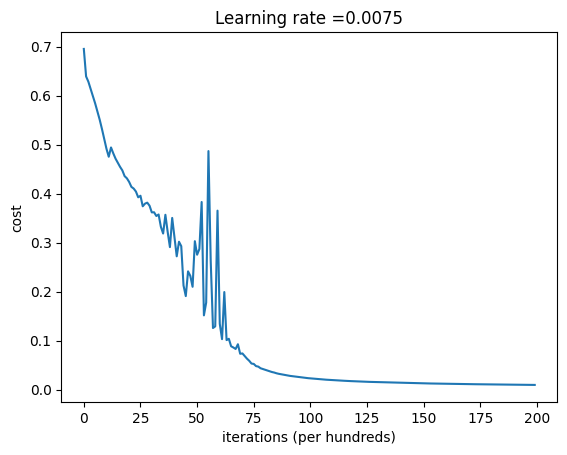

In [43]:
parameters=two_layer_model(train_set_x, train_set_y,layer_dims=(n_x,n_h,n_y),num_iterations=20000,print_cost=True)

In [44]:
def predict(X, Y, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1,cache1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2,cache2 = sigmoid(Z2)

    # Convert probabilities to binary predictions
    predictions = (A2 > 0.5) * 1.0

    # Calculate accuracy
    accuracy = np.mean(predictions == Y) * 100

    return accuracy

In [45]:
predictions_train = predict(train_set_x,train_set_y, parameters)
print(f"Training accuracy: {predictions_train}%")

Training accuracy: 100.0%


In [46]:
predictions_test = predict(test_set_x,test_set_y, parameters)
print(f"Testing accuracy: {predictions_test}%")

Testing accuracy: 34.0%


The model is still overfitting.

In [47]:
def L_layer_model(X,Y,layer_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  parameters=initialize_deep(layer_dims)
  costs=[]
  m=X.shape[1]
  for i in range(0,num_iterations):
    AL,caches=L_model_forward(parameters,X)
    cost=compute_cost(AL,Y)
    grads=L_model_backward(AL,Y,caches)
    parameters = update_parameters(parameters, grads, learning_rate)
    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    if i % 100 == 0:
      costs.append(cost)
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters

In [48]:
layer_dims = [12288, 20, 7, 5, 1]

Cost after iteration 0: 0.646600
Cost after iteration 1000: 0.416382
Cost after iteration 2000: 0.279964
Cost after iteration 3000: 0.259304
Cost after iteration 4000: 0.060339
Cost after iteration 5000: 0.019450
Cost after iteration 6000: 0.012019
Cost after iteration 7000: 0.008541
Cost after iteration 8000: 0.006520
Cost after iteration 9000: 0.005191


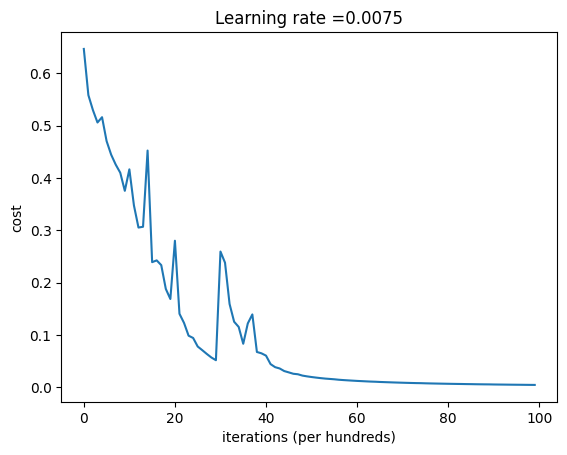

In [49]:
para = L_layer_model(train_set_x, train_set_y, layer_dims, num_iterations = 10000, print_cost = True)

In [84]:
def predict1(X, Y, parameters):
    L = len(parameters) // 2  # Number of layers in the neural network
    A = X  # Input to the first layer

    # Forward propagation through all layers
    for l in range(1, L + 1):
        W = parameters[f"W{l}"]
        b = parameters[f"b{l}"]

        Z = np.dot(W, A) + b  # Linear step

        if l < L:  # Apply ReLU for all layers except the last
            A, _ = relu(Z)  # Only keep the activation, discard the cache
        else:  # Apply sigmoid activation for the output layer
            A, _ = sigmoid(Z)  # Only keep the activation, discard the cache

    # A is the output of the last layer, convert probabilities to binary predictions
    predictions = (A > 0.5).astype(float)

    # Calculate accuracy
    accuracy = np.mean(predictions == Y) * 100

    return accuracy

In [51]:
try:
    accuracy = predict1(test_set_x,test_set_y, para)
    print(f"\n testing Accuracy: {accuracy}%")
except Exception as e:
    print(f"An error occurred: {e}")

Input shape: (12288, 50)
Y shape: (1, 50)

Layer 1:
W1 shape: (20, 12288)
b1 shape: (20, 1)
A shape before: (12288, 50)
Z shape after: (20, 50)
A shape after: (20, 50)

Layer 2:
W2 shape: (7, 20)
b2 shape: (7, 1)
A shape before: (20, 50)
Z shape after: (7, 50)
A shape after: (7, 50)

Layer 3:
W3 shape: (5, 7)
b3 shape: (5, 1)
A shape before: (7, 50)
Z shape after: (5, 50)
A shape after: (5, 50)

Layer 4:
W4 shape: (1, 5)
b4 shape: (1, 1)
A shape before: (5, 50)
Z shape after: (1, 50)
A shape after: (1, 50)

Final predictions shape: (1, 50)

 testing Accuracy: 34.0%


Training accuracy improved by very little, there is still much overfitting going on.

### Let The Fun Begin With REGULARIZATION.

In [52]:
def compute_cost_with_reg(AL,Y,parameters,lambd):
  m=Y.shape[1]
  cross_entropy_cost=compute_cost(AL,Y)
  L=len(parameters)//2
  L2_regularization_cost=0
  for l in range(L):
    L2_regularization_cost+=np.sum(np.square(parameters["W"+str(l+1)]))
  L2_regularization_cost=L2_regularization_cost*lambd/(2*m)
  cost=cross_entropy_cost+L2_regularization_cost
  return cost

In [54]:
def linear_backward_with_reg(dZ,cache,lambd):
  A_prev,W,b=cache
  m=A_prev.shape[1]
  dW=(1/m)*np.dot(dZ,A_prev.T)+(lambd/m)*W
  db=(1/m)*np.sum(dZ,axis=1,keepdims=True)
  dA_prev=np.dot(W.T,dZ)

  return dA_prev,dW,db

In [55]:
def linear_activation_backward_with_reg(dA,cache,activation,lambd):
  linear_cache,activation_cache=cache
  if activation=="sigmoid":
    dZ=sigmoid_backward(dA,activation_cache)
  elif activation=="relu":
    dZ=relu_backward(dA,activation_cache)
  dA_prev,dW,db=linear_backward_with_reg(dZ,linear_cache,lambd)
  return dA_prev,dW,db

In [59]:
def L_model_backward_with_reg(AL,Y,caches,lambd):
  grads={}
  m=AL.shape[1]
  L=len(caches)
  dAL=np.divide(-Y,AL)+np.divide((1-Y),(1-AL))
  current_cache=caches[L-1]    #cache for layer L-1
  grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)]=linear_activation_backward_with_reg(dAL,current_cache,"sigmoid",lambd)  #dA4,dW5,db5
  for l in reversed(range(L-1)):
    current_cache=caches[l]
    grads["dA"+str(l)],grads["dW"+str(l+1)],grads["db"+str(l+1)]=linear_activation_backward_with_reg(grads["dA"+str(l+1)],current_cache,"relu",lambd) #dA3,dW4,db4

  return grads

In [65]:
def L_layer_model_with_reg(X,Y,layer_dims,lambd,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  parameters=initialize_deep(layer_dims)
  costs=[]
  m=X.shape[1]
  for i in range(0,num_iterations):
    AL,caches=L_model_forward(parameters,X)
    cost=compute_cost_with_reg(AL,Y,parameters,lambd)
    grads=L_model_backward_with_reg(AL,Y,caches,lambd)
    parameters = update_parameters(parameters, grads, learning_rate)
    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    if i % 100 == 0:
      costs.append(cost)
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters

Cost after iteration 0: 1.023766
Cost after iteration 1000: 0.585083
Cost after iteration 2000: 0.501994
Cost after iteration 3000: 0.741607
Cost after iteration 4000: 1.124651
Cost after iteration 5000: 0.479136
Cost after iteration 6000: 0.543820
Cost after iteration 7000: 0.311847
Cost after iteration 8000: 0.240641
Cost after iteration 9000: 0.206246
Cost after iteration 10000: 0.187361
Cost after iteration 11000: 0.173832
Cost after iteration 12000: 0.162137
Cost after iteration 13000: 0.676503
Cost after iteration 14000: 0.578766
Cost after iteration 15000: 0.383165
Cost after iteration 16000: 0.330442
Cost after iteration 17000: 0.388762
Cost after iteration 18000: 0.290583
Cost after iteration 19000: 0.240128


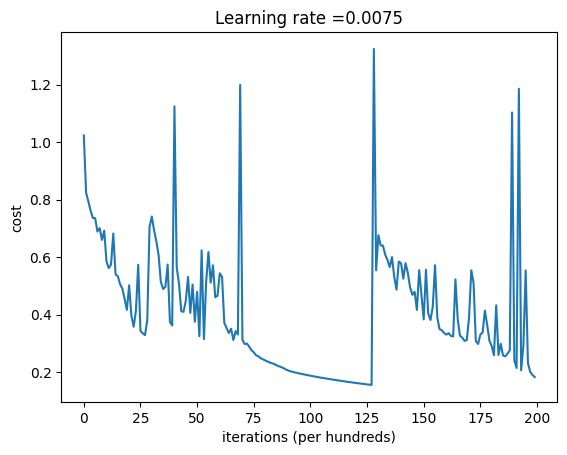

In [95]:
para2=L_layer_model_with_reg(train_set_x, train_set_y,layer_dims,lambd=1.5,learning_rate=0.0075,num_iterations=20000,print_cost=True)

In [96]:
try:
    accuracy = predict1(train_set_x, train_set_y, para2)
    print(f"\n training Accuracy with regularization: {accuracy}%")
except Exception as e:
    print(f"An error occurred: {e}")

try:
    accuracy1 = predict1(test_set_x,test_set_y, para2)
    print(f"\n testing Accuracy after regularization: {accuracy1}%")
except Exception as e:
    print(f"An error occurred: {e}")


 training Accuracy with regularization: 100.0%

 testing Accuracy after regularization: 34.0%


I guess there must be problem with testing dataset :(

Anyways, lets try DROPOUT NOW.

Forward propagation with DROPOUT

In [82]:
def linear_activation_forward_with_dropout(A_prev, W, b, activation, keep_prob=1):
    Z, linear_cache = linear_forward(A_prev, W, b)

    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        A, activation_cache = relu(Z)

    # Dropout
    D = None  # Initialize D to None by default
    if keep_prob < 1:
        D = np.random.rand(A.shape[0], A.shape[1])
        D = (D < keep_prob).astype(int)
        A = A * D
        A = A / keep_prob

    # Cache for both activation and dropout
    cache = (linear_cache, activation_cache, D)
    return A, cache

In [76]:
def L_model_forward_with_dropout(parameters, X, keep_prob=1):
    caches = []
    A = X
    L = len(parameters) // 2  # Number of layers in the neural network

    # Implement forward propagation with dropout for [1,...,L-1] layers
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward_with_dropout(A_prev, parameters["W" + str(l)], parameters["b" + str(l)],
                                                          activation="relu", keep_prob=keep_prob)
        caches.append(cache)

    # Output layer (without dropout)
    AL, cache = linear_activation_forward_with_dropout(A, parameters["W" + str(L)], parameters["b" + str(L)],
                                                       activation="sigmoid", keep_prob=1)
    caches.append(cache)

    return AL, caches

In [77]:
def linear_activation_backward(dA, cache, activation, keep_prob=1):
    linear_cache, activation_cache, D = cache

    # Apply dropout to the gradient if dropout was used in the forward pass
    if D is not None:
        dA = dA * D
        dA = dA / keep_prob

    # Compute dZ based on the activation function used
    if activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
    elif activation == "relu":
        dZ = relu_backward(dA, activation_cache)

    # Compute gradients
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [78]:
def L_model_backward_with_dropout(AL, Y, caches, keep_prob=1):
    grads = {}
    m = AL.shape[1]
    L = len(caches)

    # Initialize the backpropagation with the derivative of the cost function
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Backpropagation for the last layer (output layer)
    current_cache = caches[L - 1]
    grads["dA" + str(L - 1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(
        dAL, current_cache, activation="sigmoid", keep_prob=1
    )

    # Backpropagation through remaining layers with dropout
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation="relu", keep_prob=keep_prob)

        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db

    return grads

In [80]:
def L_layer_model_with_dropout(X,Y,layer_dims,keep_prob=1,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  parameters=initialize_deep(layer_dims)
  costs=[]
  m=X.shape[1]
  for i in range(0,num_iterations):
    AL,caches=L_model_forward_with_dropout(parameters,X,keep_prob)
    cost=compute_cost(AL,Y)
    grads=L_model_backward_with_dropout(AL,Y,caches,keep_prob)
    parameters = update_parameters(parameters, grads, learning_rate)
    if print_cost and i % 1000 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
    if i % 100 == 0:
      costs.append(cost)
  plt.plot(np.squeeze(costs))
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()

  return parameters

Cost after iteration 0: 0.806059
Cost after iteration 1000: 0.539128
Cost after iteration 2000: 0.449406
Cost after iteration 3000: 0.413463
Cost after iteration 4000: 0.465045
Cost after iteration 5000: 0.481898
Cost after iteration 6000: 0.366404
Cost after iteration 7000: 0.388923
Cost after iteration 8000: 0.371603
Cost after iteration 9000: 0.370944
Cost after iteration 10000: 0.372752
Cost after iteration 11000: 0.381095
Cost after iteration 12000: 0.398405
Cost after iteration 13000: 0.372071
Cost after iteration 14000: 0.417074
Cost after iteration 15000: 0.374689
Cost after iteration 16000: 0.425880
Cost after iteration 17000: 0.369683
Cost after iteration 18000: 0.383423
Cost after iteration 19000: 0.407616


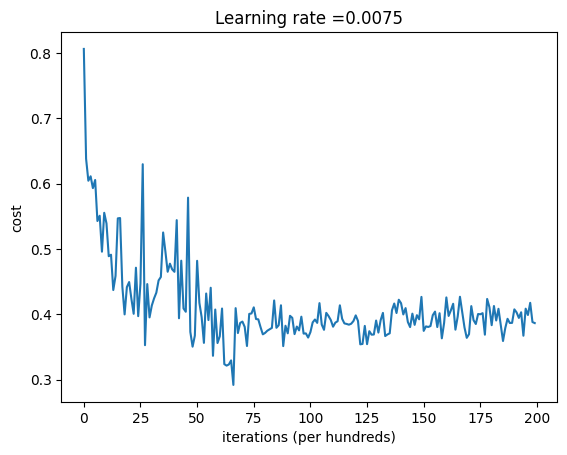

In [86]:
para3=L_layer_model_with_dropout(train_set_x,train_set_y,layer_dims,keep_prob=0.8,learning_rate=0.0075,num_iterations=20000,print_cost=True)

In [89]:
try:
    accuracy = predict1(train_set_x, train_set_y, para3)
    print(f"\n training Accuracy with dropout: {accuracy}%")
except Exception as e:
    print(f"An error occurred: {e}")

try:
    accuracy1 = predict1(test_set_x,test_set_y, para3)
    print(f"\n testing Accuracy after dropout: {accuracy1}%")
except Exception as e:
    print(f"An error occurred: {e}")


 training Accuracy with dropout: 76.07655502392345%

 testing Accuracy after dropout: 54.0%


Testing accuracy increased a little responding to dropout but then training accuracy is reduced as well.